<a href="https://colab.research.google.com/github/wavelet2008/011_Hisi3516AV200_source_code/blob/main/florence_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install einops flash_attn timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 593.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusp

In [19]:
import requests

from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM


model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-base", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-base", trust_remote_code=True)

prompt = "<OD>"

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

image.save('local_image.jpg')

inputs = processor(text=prompt, images=image, return_tensors="pt")

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    num_beams=3,
    do_sample=False
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

parsed_answer = processor.post_process_generation(generated_text, task="<OD>", image_size=(image.width, image.height))

print(parsed_answer)

{'<OD>': {'bboxes': [[34.23999786376953, 160.0800018310547, 597.4400024414062, 371.7599792480469], [272.32000732421875, 241.67999267578125, 303.67999267578125, 247.4399871826172], [454.0799865722656, 276.7200012207031, 553.9199829101562, 370.79998779296875], [96.31999969482422, 280.55999755859375, 198.0800018310547, 371.2799987792969]], 'labels': ['car', 'door handle', 'wheel', 'wheel']}}


In [20]:
print(parsed_answer['<OD>']['bboxes'])

[[34.23999786376953, 160.0800018310547, 597.4400024414062, 371.7599792480469], [272.32000732421875, 241.67999267578125, 303.67999267578125, 247.4399871826172], [454.0799865722656, 276.7200012207031, 553.9199829101562, 370.79998779296875], [96.31999969482422, 280.55999755859375, 198.0800018310547, 371.2799987792969]]


In [16]:
print(parsed_answer['<OD>']['labels'])
print(parsed_answer['<OD>']['labels'])



['car', 'door handle', 'wheel', 'wheel']
['car', 'door handle', 'wheel', 'wheel']


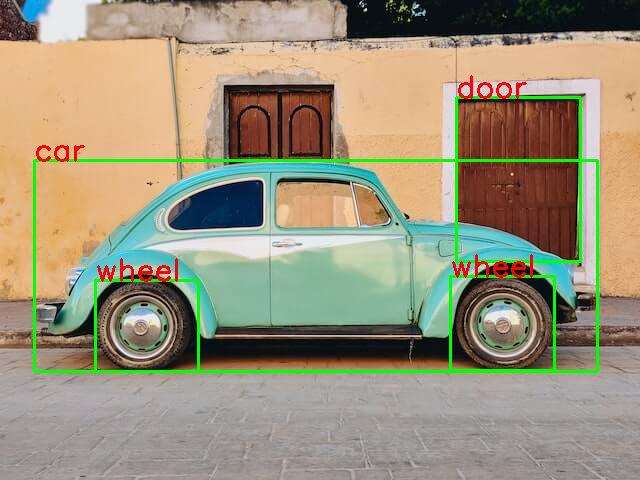

In [27]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('local_image.jpg')
#print(img)
a=0
for x in lst:
  x1, y1, x2, y2 = map(int,x[1])
  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  cv2.putText(img, x[0], (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
  a+=1
cv2_imshow(img)
#cv2.imshow('xx',img)

In [5]:
lst = list(zip(parsed_answer['<OD>']['labels'], parsed_answer['<OD>']['bboxes']))